#Very simple notebook that choose the fields around the selected dwarf galaxies and counts the visits!

In [1]:
from __future__ import print_function
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.db as db
import pandas as pd
import mafContrib
from mafContrib import PeriodicStarMetric 
from mafContrib  import TransientAsciiMetric

In [2]:
# Read the field list.
fields = pd.read_csv('field_list.csv')
# what does the field list look like?
#fields[0:5]


In [3]:
runName = 'baseline2018a'
dbFile = 'baseline2018a.db'
opsdb = db.OpsimDatabase(dbFile)


mjdcol = 'observationStartMJD'
degrees = True

outDir = 'Transients'
resultsDb = db.ResultsDb(outDir=outDir)

In [4]:
#le coordinate di M54/Sagittarius
ra_Sag = [283.763641]
dec_Sag = [-30.478501]
Sag_coo = (283.763641, -30.478501)
#le coordinate di Sculptor
ra_Sc = [15.038984]
dec_Sc = [-33.709029]
Sc_coo = (15.038984,-33.7090278 )
#le coordinate di Carina
ra_Ca = [100.402888]
dec_Ca = [-50.966196]
Ca_coo = (100.402888,-50.966196)
#le coordinate di Fornax
ra_Fo = [39.997200]
dec_Fo = [-34.449187]
Fo_coo = (39.997200,-34.449187)
#le coordinate di Phoenix
ra_Ph = [27.776421]
dec_Ph = [-44.444686]
Ph_coo = (27.776421,-44.444686)
#le coordinate di Antlia 2
ra_An = [143.8868]
dec_An = [-36.7673]
An_coo = (143.8868,-36.7673)

ra=(283.763641,15.038984,100.402888,39.997200,27.776421,143.8868)
dec=(-30.478501,-33.709029,-50.966196,-34.449187,-44.444686,-36.7673)

In [5]:
#Choose the fields around selected dwarf galaxies
Sag = fields.query('(((ra-@Sag_coo[0])**2 + (dec-@Sag_coo[1])**2)**0.5) < 1.5')
Sc = fields.query('(((ra-@Sc_coo[0])**2 + (dec-@Sc_coo[1])**2)**0.5) < 1.5')
Ca = fields.query('(((ra-@Ca_coo[0])**2 + (dec-@Ca_coo[1])**2)**0.5) < 1.5')
Fo = fields.query('(((ra-@Fo_coo[0])**2 + (dec-@Fo_coo[1])**2)**0.5) < 1.5')
Ph = fields.query('(((ra-@Ph_coo[0])**2 + (dec-@Ph_coo[1])**2)**0.5) < 1.5')
An = fields.query('(((ra-@An_coo[0])**2 + (dec-@An_coo[1])**2)**0.5) < 1.8')
wfd = fields.query('(dec >= -72.25) and (dec <= 12.4) and ((gb >= 15) or (gb <= -15))')

#Distances
#Saggitarius
mu_Sag= 17.13
Ebv_Sag = 0.15
#Sculptor
mu_Sc= 19.57 
Ebv_Sc = 0.016
#Carina
mu_Ca=20.08 
Ebv_Ca=0.05
#Fornax
mu_Fo=20.70
Ebv_Fo=0.02
#Phoenix
mu_Ph=23.10 
Ebv_Ph= 0.014
#Antalia 2
mu_An=20.56 
Ebv_An= 0.19

print("The number of fields taround Sagittarius is %d" % (len(Sag)))
print("The number of fields around Sculptor is %d" % (len(Sc)))
print("The number of fields around Carina is %d" % (len(Ca)))
print("The number of fields around Fornax is %d" % (len(Fo)))
print("The number of fields around Phoenix is %d" % (len(Ph)))
print("The number of fields around Antalia is %d" % (len(An)))

The number of fields taround Sagittarius is 1
The number of fields around Sculptor is 1
The number of fields around Carina is 1
The number of fields around Fornax is 1
The number of fields around Phoenix is 1
The number of fields around Antalia is 1


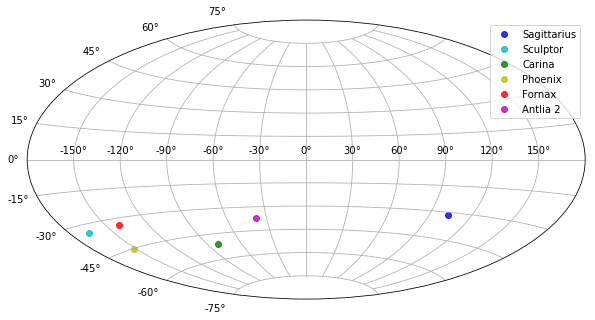

In [132]:
def radec2project(ra, dec):
    return (np.radians(ra) - np.pi, np.radians(dec))

fig = plt.figure(figsize=(10, 10))
ax = plt.subplot(111, projection="aitoff")
#ax.scatter(x, y, alpha=0.5)
#x, y = radec2project(wfd.ra, wfd.dec)
#ax.scatter(x, y, alpha=0.5, color='r')

x, y = radec2project(Sag.ra, Sag.dec)
ax.scatter(x, y, alpha=0.8, color='B', label='Sagittarius')
x, y = radec2project(Sc.ra, Sc.dec)
ax.scatter(x, y, alpha=0.8, color='C', label='Sculptor')
x, y = radec2project(Ca.ra, Ca.dec)
ax.scatter(x, y, alpha=0.8, color='G', label='Carina')
x, y = radec2project(Ph.ra, Ph.dec)
ax.scatter(x, y, alpha=0.8, color='Y', label='Phoenix')
x, y = radec2project(Fo.ra, Fo.dec)
ax.scatter(x, y, alpha=0.8, color='R', label='Fornax')
x, y = radec2project(An.ra, An.dec)
ax.scatter(x, y, alpha=0.8, color='M', label='Antlia 2')
plt.legend(loc='upper right', fancybox=True)
plt.grid(True)
plt.savefig('WP_fig1.eps')

In [7]:
Sag

,fieldId,fov,ra,dec,gl,gb,el,eb
1253,1254,3.5,283.032991,-31.621145,4.270954,-13.967261,-78.729821,-8.687872


In [8]:
Sc

,fieldId,fov,ra,dec,gl,gb,el,eb
1181,1182,3.5,13.56019,-33.824705,-62.046153,-83.276434,-2.958549,-36.029344


In [9]:
Ca

,fieldId,fov,ra,dec,gl,gb,el,eb
586,587,3.5,99.135906,-50.859846,-100.23295,-22.963612,110.908935,-73.63772


In [10]:
Ph

,fieldId,fov,ra,dec,gl,gb,el,eb
771,772,3.5,28.020715,-45.277906,-86.766504,-68.194231,1.975004,-51.572209


In [11]:
Fo

,fieldId,fov,ra,dec,gl,gb,el,eb
1201,1202,3.5,39.373666,-33.1466,-125.864948,-66.364555,22.699556,-45.474453


In [12]:
An

,fieldId,fov,ra,dec,gl,gb,el,eb
1027,1028,3.5,142.225127,-37.272608,-95.72384,9.965373,161.906521,-48.549717


In [118]:
#Sql
year_start=0
year_finish=2
sql = 'night between %d and %d' % (365.25 * year_start, 365.25 * year_finish)
#sqlconstraint = 'night < 365 and filter="g"'

In [14]:
#Slicers

slicer_All=slicers.UserPointsSlicer(ra=ra,dec=dec)

In [15]:
#How many visits in the selected fields


In [133]:
metric=metrics.PassMetric(cols=[mjdcol, 'fiveSigmaDepth', 'filter'])
slicer_Sag = slicers.UserPointsSlicer(ra=ra_Sag,dec=dec_Sag)
slicer_Sc = slicers.UserPointsSlicer(ra=ra_Sc,dec=dec_Sc)
slicer_Ca = slicers.UserPointsSlicer(ra=ra_Ca,dec=dec_Ca)
slicer_Fo = slicers.UserPointsSlicer(ra=ra_Fo,dec=dec_Fo)
slicer_Ph = slicers.UserPointsSlicer(ra=ra_Ph,dec=dec_Ph)
slicer_An = slicers.UserPointsSlicer(ra=ra_An,dec=dec_An)
#Choose your  dwarf:
slicer=slicer_An
bundle = metricBundles.MetricBundle(metric, slicer, sql, runName=runName)
bgroup = metricBundles.MetricBundleGroup(
    {0: bundle}, opsdb, outDir=outDir, resultsDb=resultsDb)
bgroup.runAll()

Querying database SummaryAllProps with constraint night between 0 and 730 for columns ['filter', 'fiveSigmaDepth', 'fieldRA', 'fieldDec', 'observationStartMJD']
Found 453105 visits
Running:  [0]
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.


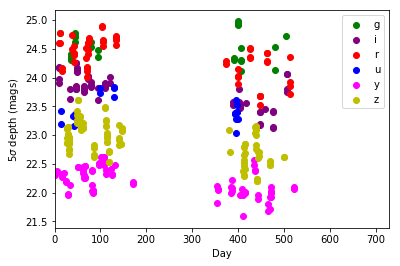

In [131]:
mv = bundle.metricValues[0]
filters = np.unique(bundle.metricValues[0]['filter'])
colors = {'u': 'b','g': 'g','r': 'r',
          'i': 'purple',"z": 'y',"y": 'magenta'}
for filterName in filters:
    good = np.where(mv['filter'] == filterName)
    plt.scatter(mv[mjdcol][good]-mv[mjdcol].min(),
                mv['fiveSigmaDepth'][good],
                c=colors[filterName], label=filterName)


plt.xlabel('Day')
plt.ylabel('5$\sigma$ depth (mags)')
plt.xlim([365*year_start,365*year_finish])
plt.legend(scatterpoints=1)



In [123]:
print('%i Observations total at this point (All SNR levels)' % (
    bundle.metricValues.data[0].size))
for fname in filters:
    good = np.where(bundle.metricValues.data[0]['filter'] == fname)
    print('%i Observations in %s' % (good[0].size, fname))

325 Observations total at this point (All SNR levels)
26 Observations in g
47 Observations in i
44 Observations in r
22 Observations in u
96 Observations in y
90 Observations in z
